Activitat 1: Oxigen (Z = 8)

En aquesta activitat, determinareu els valors dels termes de volum i asimetria en el Model de Gota Líquida basant-vos en les dades experimentals dels isòtops d’oxigen.

Taula 1: es mostren els paràmetres de la fórmula del Model de Gota Líquida (MGL). Podeu tornar a visitar el vídeo del Dr. Arnau Rios (https://youtu.be/Qsu7IrGiOIk) sobre aquest tema per obtenir més informació sobre cada paràmetre.

Taula 2: es mostra l'energia d'enllaç per nucleó mesurada experimentalment i calculada teòricament (l'energia d'enllaç dividida per A, el nombre total de neutrons i protons) per a tots els isòtops d'oxigen observats (nombre de protons Z=8). Els valors calculats teòricament utilitzen els paràmetres de la taula 1.

Totes les energies es donen en unitats de kilo-electrons-volts (keV).

Figura 1 A continuació es mostra l'energia d'enllaç per nucleó mesurada experimentalment i calculada teòricament per a tots els isòtops d'oxigen observats (de la Taula 2). La Figura 2 mostra la diferència entre aquestes energies d’enllaç mesurades amb experients o calculades teòricament (última columna de la taula 2), utilitzant els paràmetres del model de la Taula 1.

El vostre objectiu és canviar els paràmetres de la taula 1 de manera que les diferències en valors experimentals i teòrics siguin el més a prop possible de zero. D'això se'n diu optimitzar els paràmetres. Seguiu llegint per esbrinar com.

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib nbagg

In [8]:
def extract(x):
    global extract_n
    extract_n = df.loc[df['Element'] == x]
    return

def update_plot(element, av, aS, ac, aA, ap):
    global y, df
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    df = pd.read_fwf('mass_1.mas20.txt',    
                 usecols=(2, 3, 4, 6, 11),
                 names=['N', 'Z', 'A', 'Element', 'Experimental'],
                 widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12,1),
                 header=28, 
                 index_col=False)

    df['Experimental'] = pd.to_numeric(df.Experimental.str.replace('#',''))
    extract(element)


    
    axes[0].clear()
    axes[1].clear()
    Z = extract_n.Z
    A = extract_n.A
    y = (av*A-aS*pow(A,2/3)-ac*pow(Z,2)*pow(A,-1/3)-aA*pow((A-2*Z),2)/A +((A % 2)==0) * ap/np.sqrt(A))*1000/A
    y = y.to_frame()
    y = y.rename(columns = {0:'Teòrica'})
    
    df = pd.concat([extract_n, y], axis=1)
    df['Diferència'] = (df.Experimental - df.Teòrica)  
    df.reset_index(drop=True, inplace=True)    
    
    axes[0].plot(A, y, label='Teòrica')
    extract_n.plot(x='A',y='Experimental', ax=axes[0])
    axes[0].legend(loc=4)
    axes[0].set_xlabel('Nombre de massa (A)')
    axes[0].set_ylabel('$Energia \ d\'enllaç \ BE/A$ (keV)')
    
    df.plot(x='A', 
            y='Diferència', 
            ax=axes[1], 
            xlabel='Nombre de massa (A)', 
            ylabel='$Diferència \ en \ l\'Energia \ d\'enllaç \ \Delta BE/A$ (keV)')
    
    axes[0].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    axes[1].grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    plt.tight_layout()
    out = widgets.Output()
    with out:
        display(df)
    grid[0, 1]  = out
    return

<IPython.core.display.Javascript object>


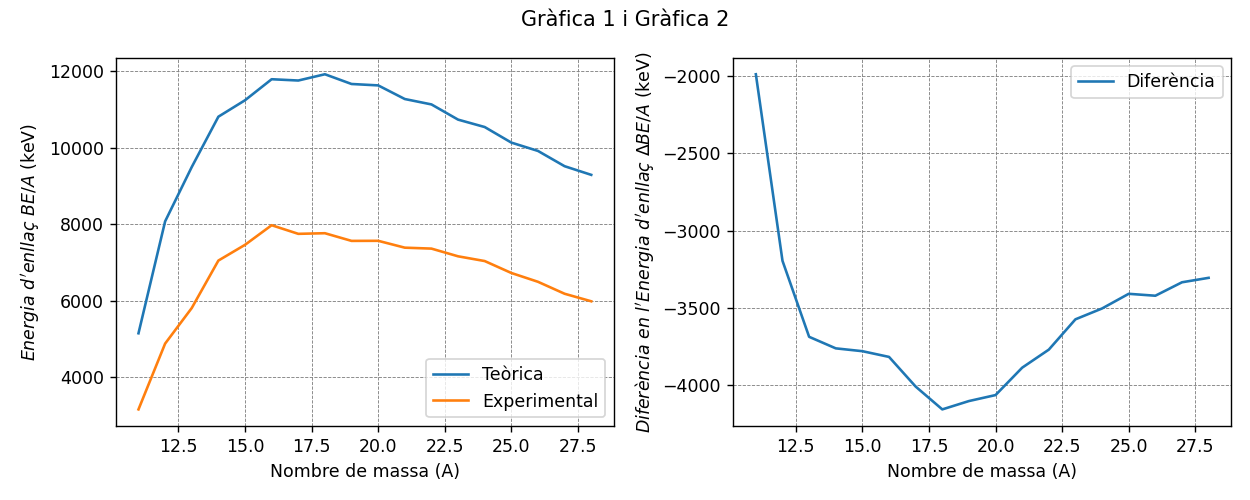

GridspecLayout(children=(interactive(children=(Text(value='O', description='Element:', placeholder="Nom de l'e…

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(10,4))
plt.suptitle('Gràfica 1 i Gràfica 2')
style = {'description_width': '200px'}
layout = widgets.Layout(width='300px') 

element = widgets.Text(
          value='O',
          placeholder='Nom de l\'element',
          description='Element:',
          disabled=False
          )

av = widgets.BoundedFloatText(value=16, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Volum:', 
                              disabled=False,
                              style=style,
                              layout=layout)

aS = widgets.BoundedFloatText(value=18.3, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Superficie:', 
                              disabled=True,
                              style=style,
                              layout=layout)

ac = widgets.BoundedFloatText(value=0.714, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Coulomb:', 
                              disabled=True,
                              style=style,
                              layout=layout)

aA = widgets.BoundedFloatText(value=23, 
                              min=0, 
                              max=50, 
                              step=0.1, 
                              description='Asimetria:', 
                              disabled=False,
                              style=style,
                              layout=layout)

ap = widgets.BoundedFloatText(value=12, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Emparellament:', 
                              disabled=True,
                              style=style,
                              layout=layout)

grid = widgets.GridspecLayout(1, 2, height='auto')
grid[0, 0] = widgets.interactive(update_plot, element=element, av=av, aS=aS, ac=ac, aA=aA, ap=ap)

grid

Activitat 1a

L’oxigen-16 (A = 16) té 8 protons i 8 neutrons. Quan un isòtop té el mateix nombre de protons i neutrons, diem que és simètric en Z i N. Això significa que el terme d’asimetria (aA) no té cap efecte sobre l’energia d’enllaç. Les dades d’oxigen-16 es ressalten a la taula 2 anterior com a fila verda.

Proveu de canviar la constant del terme d’asimetria (aA) de la taula 1 i convengeu-vos que l’energia d'enllaç (teòrica) calculada per a l’oxigen-16 (la fila verda de la taula 2) no depèn del terme d’asimetria. Tingueu en compte que el canvi de constant modificarà les energies d'enllaç de tots els altres isòtops.

Activitat 1b

(Q) Atès que el terme d’asimetria no afecta l’energia d’enllaç calculada per a l’oxigen-16, podeu posar-lo a zero per ara i utilitzar les dades experimentals de l’oxigen-16 per determinar el terme de volum (aV).

Definiu aA = 0. Trobeu un bon valor per a la constant del terme de volum: modifiqueu la constant del terme de volum (aV) a la taula 1 fins que la diferència entre el model (teòric) i les dades mesurades (experimentals) de l’oxigen-16 (fila verda) a la taula 2 siguin molt a prop de zero. Un rang raonable per començar és d'entre 10 i 20 MeV. La vostra resposta final per a la constant del terme de volum (aV) ha de tenir una precisió de com a mínim 0.1 MeV.

Activitat 1c

(Q) Ara que ja sabeu quin és el terme de volum, podeu passar a determinar el terme d’asimetria (aA) en funció de la forma de la corba d’energia d'enllaç a través de tots els isòtops d’oxigen que es mostren a les figures.

Trobeu un bon valor per al terme de constant d’asimetria: podeu fer-ho variant la constant (aA) de la taula 1 fins que la forma de la corba d’energia d'enllaç teòrica coincideixi amb les dades experimentals del gràfic 1. Això també hauria de minimitzar la diferència representada a la figura 2 (és a dir, a la figura 2 la línia hauria de ser propera a zero). Us suggerim que comenceu explorant què passa quan canvieu el paràmetre d’asimetria en passos de 10 MeV de -30 a 30 MeV. Tingueu en compte que no podreu obtenir un coincidència perfecta. Aquesta incertesa es pot utilitzar per obtenir una incertesa sobre el propi terme d'asimetria. La resposta final per al terme de asimetria constant (aA) ha de tenir una precisió aproximada de 1 MeV.

Activitat 1d

Ara que heu determinat tant el terme de volum (aV) com el terme d’asimetria (aA) del model de gota liquida, podem investigar l’efecte del terme d'aparellament.

Si manteniu el terme de volum (aV) i el de asimetria (aA) en els paràmetres optimitzats (les respostes que heu trobat als apartats 1b i 1c), ooseu el terme d'aparellament a zero. A la figura 2, hi veureu un efecte sorprenent en funció de si hi ha un nombre senar o parell de neutrons a l’isòtop de l’oxigen amb masses de 13 a 17. Aquest és l’efecte del terme d’aparellament explicat al vídeo pel doctor Arnau Rios ( https://www.youtube.com/watch?v=Qsu7IrGiOIk). Quina és l’escala de les diferències que veieu a la  Figura 2 (en keV)? Com es compara això amb l'energia d'enllaç total per nucleó (en keV) de la Figura 1? [Nota: no cal que registreu les respostes a aquesta pregunta]

Ara aneu a la segona pestanya, "Predicció (oxigen)", a la part inferior de la pantalla.

In [4]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p ipywidgets,pandas,numpy,matplotlib,IPython,watermark 

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.21.0

ipywidgets: 7.6.3
pandas    : 1.2.3
numpy     : 1.19.2
matplotlib: 3.3.4
IPython   : 7.21.0
watermark : 2.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Sun Jul 25 2021 16:38:36Romance Summer Time



In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')